In [1]:
'''
This Notebook has been written to provide a quick sketch comparison between the current
year 12 AS cohort and last year's cohort.

Headline figures are as follows:
    2014-15 - 61 students, 29% of pupils failed the initial assessment (16 students)
    2015-16 - 94 students, 
    
    The grade makeup of both cohorts is broadly similar with the current cohort containing proportionally
    more A, B/C and D grade students and less B, C and C/D grade students.
    
'''

%pylab inline

import pandas as pd
import numpy as np
import sqlite3
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Populating the interactive namespace from numpy and matplotlib
Python version 3.4.3 |Anaconda 2.2.0 (64-bit)| (default, Jun  4 2015, 15:29:08) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Pandas version 0.15.2
Numpy version 1.9.2


,A,B,B/C,C,C/D,D,D/E
current_y12,18,25,13,10,20,6,2
previous_y12,10,18,4,8,17,2,2


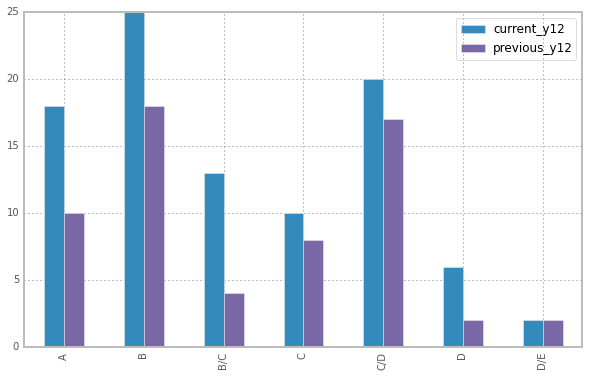

In [2]:
# Load original SIMs data for analysis
y12_current = pd.read_excel('sims_data/2015-16/Y12_data.xlsx')
y12_current.fillna('-', inplace=True)
y12_previous = pd.read_excel('sims_data/2014-15/y12maths.xlsx')
y12_previous.fillna('-', inplace=True)

raw_comp_df = pd.concat([y12_current['Y12 Ma Alps AS Estimate'].value_counts(),
                        y12_previous['Y12 Ma Alps AS Estimate'].value_counts()],
                        axis=1).transpose()
raw_comp_df.index=['current_y12', 'previous_y12']
raw_comp_df.transpose().plot(kind='bar', figsize=(10,6))
raw_comp_df

# Number of students per ALPs grade.

,A,B,B/C,C,C/D,D,D/E
current_y12,19.1,26.6,13.8,10.6,21.3,6.4,2.1
previous_y12,16.4,29.5,6.6,13.1,27.9,3.3,3.3


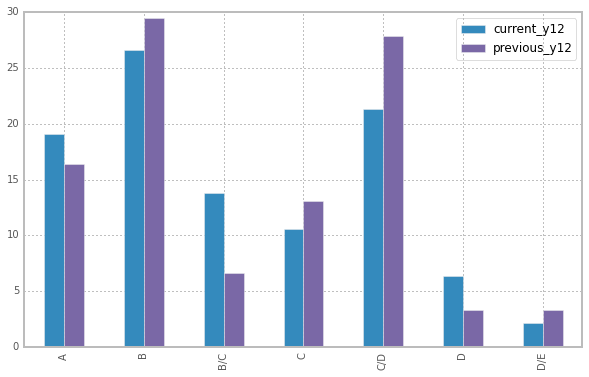

In [3]:
# ALPs grade split for both years
current_grades = y12_current['Y12 Ma Alps AS Estimate'].value_counts() / y12_current['Y12 Ma Alps AS Estimate'].count() * 100
previous_grades = y12_previous['Y12 Ma Alps AS Estimate'].value_counts() / y12_previous['Y12 Ma Alps AS Estimate'].count() * 100

comp_df = pd.concat([current_grades, previous_grades], axis=1).transpose()
comp_df.index=['current_y12', 'previous_y12']
comp_df = np.round(comp_df, 1)
comp_df.transpose().plot(kind='bar', figsize=(10,6))
comp_df

# Percentage distribution of ALPs grades for both cohorts

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ef41dfa90>]], dtype=object)

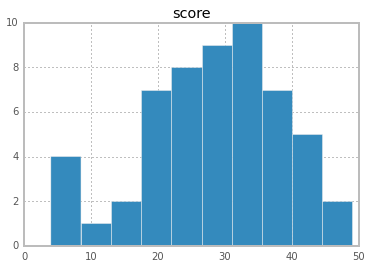

In [4]:
# Load current ClMATE data for analysis
with sqlite3.connect('ClMATE_DB.db') as DB:
    query = 'SELECT UPN, ASAlps FROM cohort WHERE INSTR(teaching_set, "12") > 0'
    cohort = DB.execute(query).fetchall()

    initial_results = list()
    for pupil in cohort:
        p = pupil[0]
        # aID for the initial assessment is 4
        query = 'SELECT pMark FROM results where UPN = ? and aID = 4'
        p_QLA = DB.execute(query, (p,)).fetchall()
        if len(p_QLA) > 1:
            p_total = sum(p_QLA)
            initial_results.append((p, p_total, pupil[1]))

cohort_df = pd.DataFrame(initial_results)
cohort_df.columns = ['UPN', 'score', 'ALPs']
cohort_df.sort('score', inplace=True)
cohort_df.hist()

# Histogram of test scores for last year's initial assessment

In [5]:
# Looking at last year's failure rate on the initial assessment over the entire cohort and split by ALPs.

# Percentage of pupils who failed the initial assessment last year
p_fail_prev = cohort_df[cohort_df['score'] < 25]['UPN'].count() / cohort_df['UPN'].count() * 100
print('Last year {0:.0f}% failed the initial assessment.'.format(p_fail_prev))

# Failure rate by ALPs
grades = list(cohort_df['ALPs'].unique())
fail_list = list()
for g in grades:
    previous_total = cohort_df[cohort_df['ALPs'] == g]['UPN'].count()
    num_fails = cohort_df[(cohort_df['ALPs'] == g) & (cohort_df['score'] < 25)]['UPN'].count()
    fail_list.append((g, previous_total, num_fails, '{0:.1f}'.format(num_fails/previous_total*100)))
fail_frame = pd.DataFrame(fail_list)
fail_frame.columns = ['ALPs', '#Pupils', '#Fails', '%failure']
fail_frame.sort('ALPs', inplace=True)
fail_frame

# Number and percentage of pupils failing the initial assessment by ALPs

Last year 29% failed the initial assessment.


,ALPs,#Pupils,#Fails,%failure
5,A,9,1,11.1
1,B,16,2,12.5
6,B/C,4,0,0.0
4,C,7,2,28.6
2,C/D,15,8,53.3
3,D,2,1,50.0
0,D/E,2,2,100.0
